In [1]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

/Users/gogreen/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
class AgentState(TypedDict):
    values: List[int]
    name: str
    result: str
    

In [ ]:
def process_values(state: AgentState) -> AgentState:
    """This process handles multiple different inputs"""
    
    print(state)
    state["result"] = f"Hi there {state['name']}! Your sum = {sum(state['values'])}"
    
    print(state)
    return state


In [22]:
graph = StateGraph(AgentState)

graph.add_node("processor", process_values)

graph.set_entry_point("processor")
graph.set_finish_point("processor")

app = graph.compile()



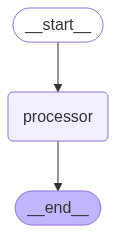

In [23]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))


In [24]:
answers = app.invoke({"values" :[1,2,3,4],"name" : "steve"})

{'values': [1, 2, 3, 4], 'name': 'steve'}
{'values': [1, 2, 3, 4], 'name': 'steve', 'result': 'Hi there steve! Your sum = 10'}


In [25]:
print(answers["result"])

Hi there steve! Your sum = 10


In [ ]:
"""---------------------"""

In [27]:
#Task

"""create a graph where u pass in a single list of integers 
along with a name and an operation. if operation is a "+", u
add the elements and if its a " * ", u multiply the elements,
all within the same node"""

"""
input: {"name"}:"jack sparrow", "values":[1,2,3,4], "operation":"*"}
output: "Hi jack sparrow! Your result = 24"
"""



'\ninput: {"name"}:"jack sparrow", "values":[1,2,3,4], "operation":"*"}\noutput: "Hi jack sparrow! Your result = 24"\n'

In [28]:
class AgentState(TypedDict):
    values: List[int]
    name: str
    operation: str
    result: str

In [32]:
def arithmetic_operations(state: AgentState) -> AgentState:
    if state["operation"] == "+":
        state["result"] = f"Hi {state['name']} your result is {sum(state['values'])}"
    elif state["operation"] == "*":
        result = 1
        for value in state['values']:
            result *= value
        state["result"] = f"Hi {state['name']} your result is {result}"
    return state


In [54]:
graph = StateGraph(AgentState)

graph.add_node("arithmetic", arithmetic_operations)

graph.set_entry_point("arithmetic")
graph.set_finish_point("arithmetic")

app = graph.compile()


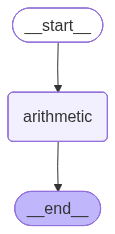

In [55]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))


In [56]:
multiply = app.invoke({"values" :[1,2,3,4],"name" : "Jack Sparrow", "operation":"*"})
add = app.invoke({"values" :[1,2,3,4],"name" : "Jack Sparrow", "operation":"+"})


In [58]:
print(multiply["result"])
print(add["result"])

Hi Jack Sparrow your result is 24
Hi Jack Sparrow your result is 10
